In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# Lecture 12

## Exercise 12.1

The aim of this lecture is to train a neural network to recognize the 10 (0-9) handwritten digits. The first thing to do is to load the dataset of MNIST that contains $70000$ images to train the NN.

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


Now we can build the NN and see if it will be able to recognize the digits. We will actually build three NNs with different optimizers (Stocastic Gradient Descend, Root Mean Square prop and Adam) to see which one is better at this task.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

sgd

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 359us/step - loss: 0.7563 - accuracy: 0.7780 - val_loss: 0.3097 - val_accuracy: 0.9184
Epoch 2/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.3795 - accuracy: 0.8924 - val_loss: 0.2353 - val_accuracy: 0.9343
Epoch 3/5
60000/60000 [==============================] - 20s 341us/step - loss: 0.3057 - accuracy: 0.9133 - val_loss: 0.1996 - val_accuracy: 0.9409
Epoch 4/5
60000/60000 [==============================] - 22s 361us/step - loss: 0.2664 - accuracy: 0.9257 - val_loss: 0.1729 - val_accuracy: 0.9500
Epoch 5/5
10000/10000 [==============================] - 2s 193us/step

Optimizer:  sgd
Test loss: 0.15403713522925974
Test accuracy: 0.953499972820282


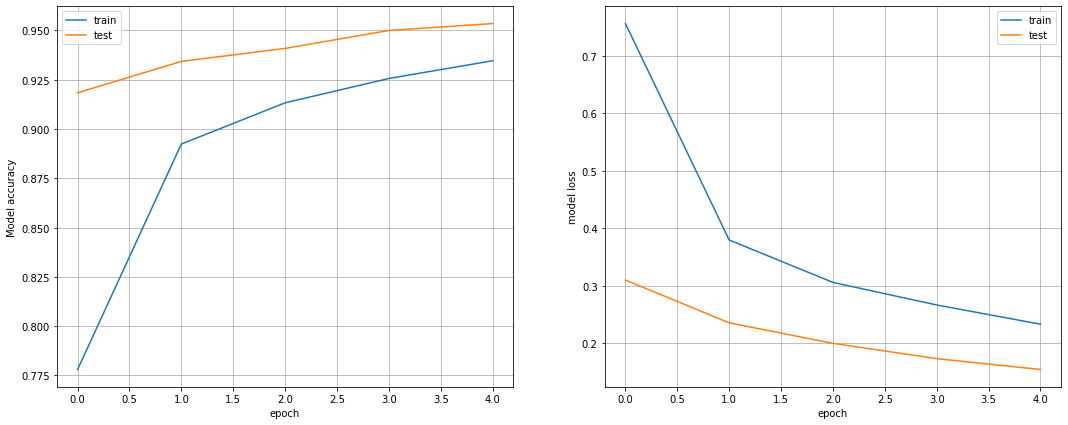

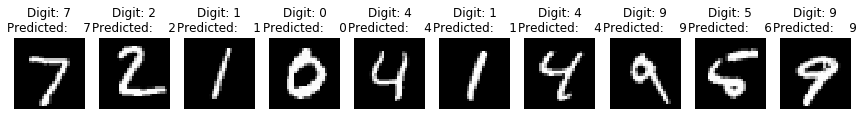

RMSprop

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 347us/step - loss: 0.2828 - accuracy: 0.9195 - val_loss: 0.1361 - val_accuracy: 0.9628
Epoch 2/5
60000/60000 [==============================] - 22s 360us/step - loss: 0.1545 - accuracy: 0.9617 - val_loss: 0.1270 - val_accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 24s 405us/step - loss: 0.1455 - accuracy: 0.9667 - val_loss: 0.1291 - val_accuracy: 0.9737
Epoch 4/5
60000/60000 [==============================] - 24s 401us/step - loss: 0.1425 - accuracy: 0.9686 - val_loss: 0.1611 - val_accuracy: 0.9737
Epoch 5/5
10000/10000 [==============================] - 2s 180us/step

Optimizer:  RMSprop
Test loss: 0.17949014512184366
Test accuracy: 0.9751999974250793


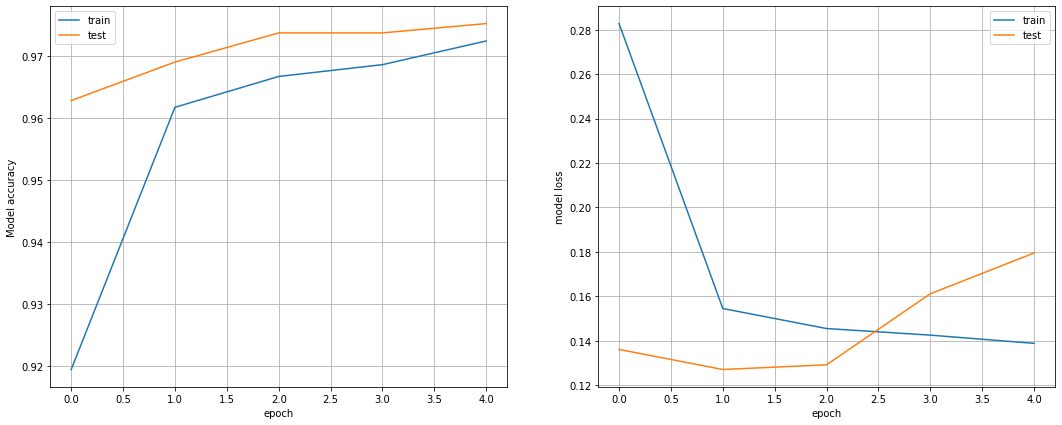

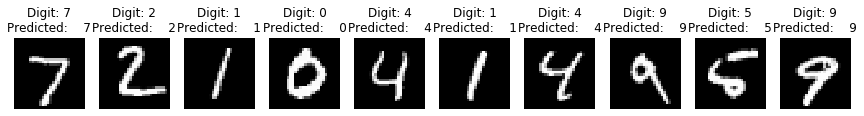

Adam

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 26s 428us/step - loss: 0.2848 - accuracy: 0.9155 - val_loss: 0.1112 - val_accuracy: 0.9667
Epoch 2/5
60000/60000 [==============================] - 25s 420us/step - loss: 0.1226 - accuracy: 0.9650 - val_loss: 0.0891 - val_accuracy: 0.9718
Epoch 3/5
60000/60000 [==============================] - 24s 400us/step - loss: 0.0883 - accuracy: 0.9748 - val_loss: 0.0769 - val_accuracy: 0.9768
Epoch 4/5
60000/60000 [==============================] - 27s 453us/step - loss: 0.0680 - accuracy: 0.9796 - val_loss: 0.0825 - val_accuracy: 0.9757
Epoch 5/5
10000/10000 [==============================] - 1s 121us/step

Optimizer:  Adam
Test loss: 0.07878905641349411
Test accuracy: 0.9793000221252441


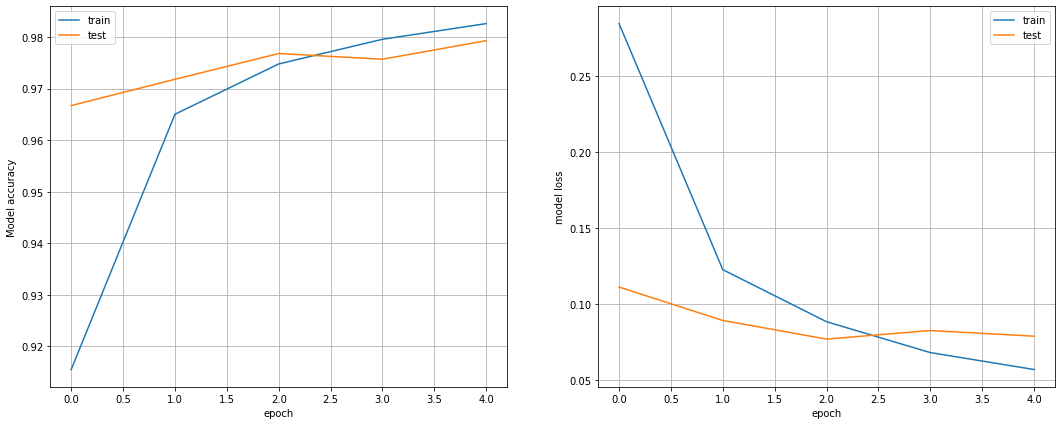

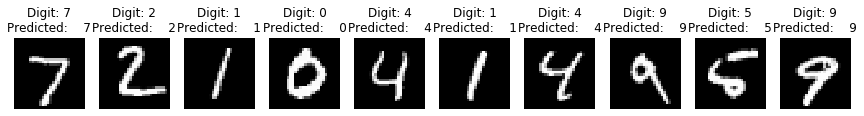

In [6]:
# training parameters
batch_size = 32
epochs = 5
Optimizer = ["sgd","RMSprop","Adam"]

i = 1

for optimizer in Optimizer:
    
    print(optimizer)
    print()
    
    # create the deep neural net
    model_DNN = compile_model(optimizer)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
                            batch_size = batch_size,
                            epochs=epochs,
                            verbose = 1,
                            validation_data = (X_test, Y_test))
    
    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose = 1)

    # print performance
    print()
    print('Optimizer: ', optimizer)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    # look into training history
    
    plt.figure(i, figsize = (18, 7))

    # summarize history for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'best')
    plt.grid(True)

    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.grid(True)
    
    plt.show()
    
    i += 1
    
    # writing digits
    predictions = model_DNN.predict(X_test)

    X_digits = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(i, figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_digits[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()
    
    i += 1

While all three optimizers have a really good accuracy in recognizing digits, the best one is clearly Adam, both per accuracy and model loss. The SGD is the only optimizer of the three that mistook a digit for another in the ten digits explicitly shown (to be fair the digit is written quite badly).

## Exercise 12.2

At this point we try to use a neural network with convolutional and pooling layers to see if that gives better results. The optimizers used is SGD.

In [7]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [8]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [9]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 46s 762us/step - loss: 0.4539 - accuracy: 0.8616 - val_loss: 0.1306 - val_accuracy: 0.9603
Epoch 2/5
60000/60000 [==============================] - 38s 637us/step - loss: 0.1214 - accuracy: 0.9620 - val_loss: 0.0791 - val_accuracy: 0.9757
Epoch 3/5
60000/60000 [==============================] - 42s 695us/step - loss: 0.0876 - accuracy: 0.9726 - val_loss: 0.0664 - val_accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 43s 723us/step - loss: 0.0699 - accuracy: 0.9785 - val_loss: 0.0570 - val_accuracy: 0.9808
Epoch 5/5
10000/10000 [==============================] - 3s 318us/step

Test loss: 0.05968922835956328
Test accuracy: 0.9796000123023987


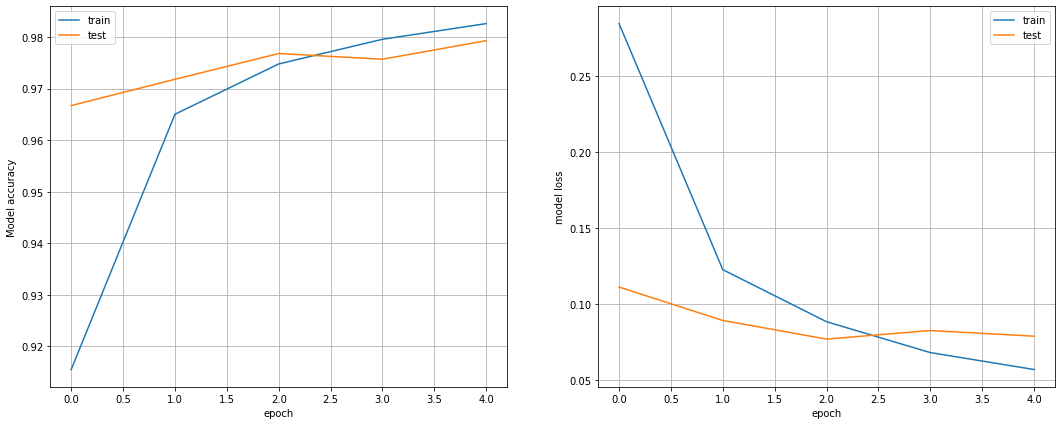

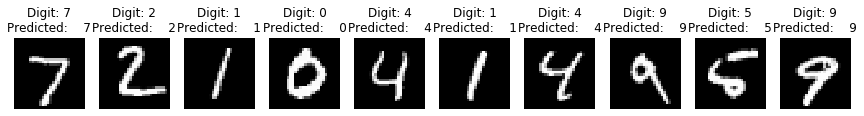

In [10]:
plt.figure(0, figsize = (18, 7))

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
    
plt.show()
    
# writing digits
predictions = model_CNN.predict(X_test)

X_digits = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(1, figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_digits[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

The performance of the NN is really good, in par with the best NN used before (the one with the Adam optimizer).

## Exercise 12.3

Having found a good neural network, we can now try to see if the CNN just built is able to recognize data not present in the MNIST dataset (my handwritten digits).

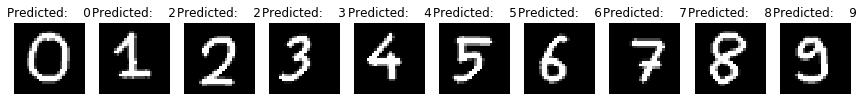

In [11]:
from PIL import Image

plt.figure(figsize=(15, 15))

for k in range(10):
    digit_filename = "./numbers/"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    plt.subplot(1, 10, k+1)   
    plt.imshow(data, cmap='gray')
    
    data = data.reshape(1,xdim*ydim)

    if tf.keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        
    pred_0 = model_CNN.predict(data)
       
    plt.title("Predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off')

plt.show()

The CNN mistook the 1 for a 2, but managed to identify all other digits, so we can say to be satisfied with its performance.